# Imports

In [1]:
## which state has the most sightings? over time?
## most frequent shape by state?
## timeline changes? trends?
## sighting density around airports/afb

In [2]:
import os
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
ufo_df = pd.read_csv('resources/ufo.csv', low_memory=False)

In [4]:
nRow, nCol = ufo_df.shape
print(f'This csv has {nRow} rows and {nCol} columns')

This csv has 80332 rows and 11 columns


In [5]:
ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
ufo_df.rename(columns = {'duration (seconds)':'duration_sec'}, inplace = True)

In [7]:
ufo_df["duration_sec"] = pd.to_numeric(ufo_df.duration_sec, errors='coerce')

In [8]:
ufo_df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration_sec            float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [9]:
ufo_df['shape'].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

In [10]:
ufo_df['state'].value_counts()

ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
      ... 
nf      25
nt      20
pe      17
yt      13
yk       7
Name: state, Length: 67, dtype: int64

In [11]:
ufo_df['country'] == 'us'

0         True
1        False
2        False
3         True
4         True
         ...  
80327     True
80328     True
80329     True
80330     True
80331     True
Name: country, Length: 80332, dtype: bool

In [12]:
df_us = ufo_df[ufo_df['country'] == 'us']

In [13]:
df_us.head(10)

,datetime,city,state,country,shape,duration_sec,duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167
10,10/10/1968 13:00,hawthorne,ca,us,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667
11,10/10/1968 19:00,brevard,nc,us,fireball,180.0,3 minutes,silent red /orange mass of energy floated by t...,6/12/2008,35.2333333,-82.734444
12,10/10/1970 16:00,bellmore,ny,us,disk,1800.0,30 min.,silver disc seen by family and neighbors,5/11/2000,40.6686111,-73.527500


In [14]:
state_count = df_us['state'].value_counts()
state_count

ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
or    1747
nc    1740
mo    1458
co    1413
in    1288
va    1273
ma    1256
ga    1255
nj    1255
wi    1232
tn    1119
mn    1012
sc    1003
ct     892
ky     855
md     837
nv     803
ok     724
nm     720
ia     678
al     642
ut     622
ks     613
ar     588
la     558
me     558
id     521
nh     486
mt     478
wv     448
ne     381
ms     375
ak     319
hi     262
vt     260
ri     228
sd     183
wy     175
de     166
nd     129
pr      25
dc       7
Name: state, dtype: int64

Text(0.5, 1.0, 'UFO Sightings per State')

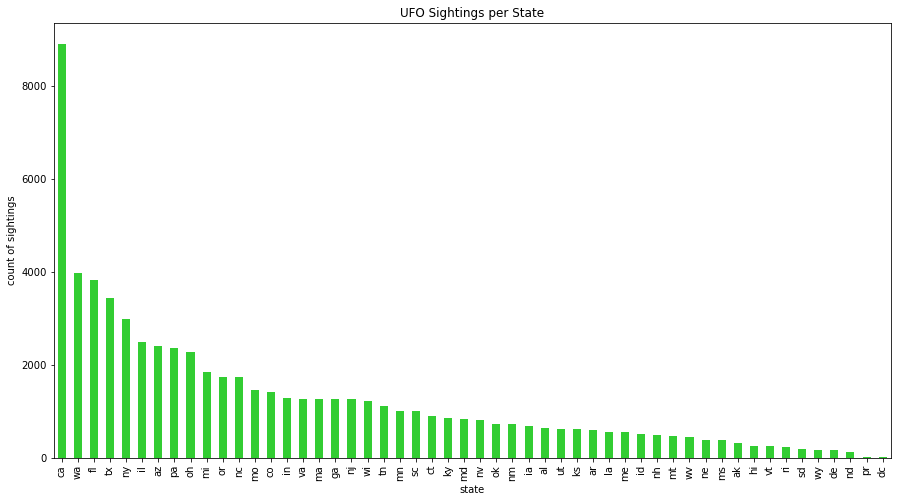

In [15]:
plt.figure(figsize=(15,8))
plot_pandas = state_count.plot.bar(color='limegreen')

plt.xlabel("state")
plt.ylabel("count of sightings")
plt.title("UFO Sightings per State")

In [16]:
state_count_top5 = df_us['state'].value_counts().head(5)
state_count_top5

ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
Name: state, dtype: int64

Text(0.5, 1.0, 'Top 5 States for UFO Sightings')

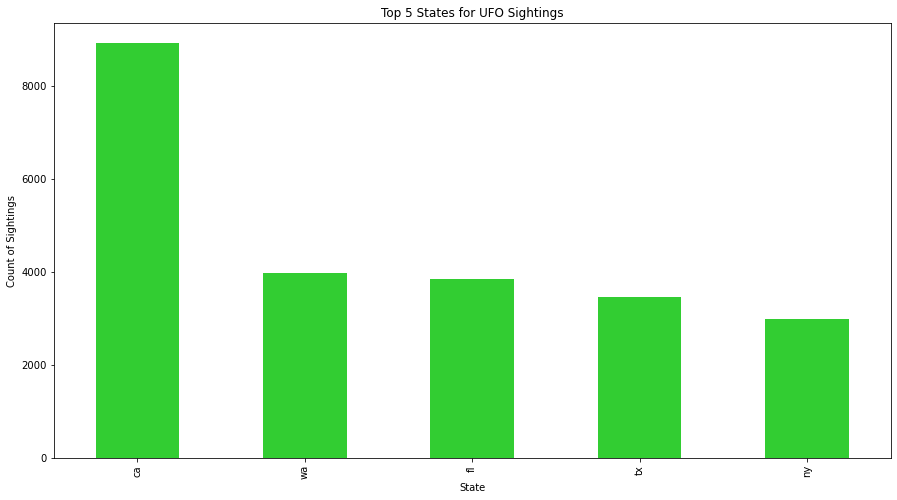

In [17]:
plt.figure(figsize=(15,8))
plot_pandas = state_count_top5.plot.bar(color='limegreen')

plt.xlabel('State')
plt.ylabel('Count of Sightings')
plt.title('Top 5 States for UFO Sightings')

In [18]:
city_count = df_us['city'].value_counts().head(10)
city_count

seattle        524
phoenix        454
portland       373
las vegas      367
los angeles    352
san diego      338
houston        297
chicago        264
tucson         241
miami          239
Name: city, dtype: int64

In [20]:
california = df_us.loc[(ufo_df['state'] == 'ca')]
california

,datetime,city,state,country,shape,duration_sec,duration (hours/min),comments,date posted,latitude,longitude
10,10/10/1968 13:00,hawthorne,ca,us,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667
30,10/10/1979 22:00,san diego,ca,us,oval,180.0,3 minutes,My 2nd UFO sighting&#44 October 1979,8/5/2001,32.7152778,-117.156389
45,10/10/1989 00:00,calabasas,ca,us,disk,300.0,approx 5 min,Unidentified object on Mulholland Highway.,12/14/2004,34.1577778,-118.637500
63,10/10/1995 22:40,oakland,ca,us,NaN,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.8044444,-122.269722
72,10/10/1998 02:30,hollywood,ca,us,changing,300.0,5 minutes,I was standing outside on Sunset Blvd. at Vine...,11/1/1998,34.0983333,-118.325833
...,...,...,...,...,...,...,...,...,...,...,...
80299,9/9/2012 20:00,arcata,ca,us,formation,600.0,10 minutes,Object with red and green lights moving sited ...,9/24/2012,40.8666667,-124.081667
80305,9/9/2012 20:30,ventura,ca,us,chevron,900.0,15 minutes,Beautiful bright blue delta shaped aerobatics.,9/24/2012,34.2783333,-119.292222
80310,9/9/2012 21:00,ventura,ca,us,circle,300.0,5 minutes,Bright Blue Object seen floating in sky near C...,9/24/2012,34.2783333,-119.292222
80316,9/9/2013 09:51,san diego,ca,us,light,4.0,~4 seconds,2 white lights zig-zag over Qualcomm Stadium (...,9/30/2013,32.7152778,-117.156389


In [26]:
cali_cities = df_us['city'].valuecounts

AttributeError: 'Series' object has no attribute 'valuecounts'